At the end of the experiment, you will be able to:


*  Apply K-Fold cross-validation method
*  Tune the hyperparameters of MLP Classifier.

### Description:

The MNIST dataset contains: 

1. 60,000 Handwritten digits as training samples and 10,000 Test samples, 
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. (approximately). 
2. Each image is Size Normalized and Centered 
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value. 
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.



### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the ’90s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of the MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license.

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.


### Challenges

Now, if you notice the images below, you will find that between 2 characters there are always certain similarities and differences. To teach a machine to recognize these patterns and identify the correct output.

![altxt](https://www.researchgate.net/profile/Radu_Tudor_Ionescu/publication/282924675/figure/fig3/AS:319968869666820@1453297931093/A-random-sample-of-6-handwritten-digits-from-the-MNIST-data-set-before-and-after.png)

Hence, all these challenges make this a good problem to solve in Machine Learning.


## Domain Information

Handwriting changes person to person. Some of us have neat handwriting and some have illegible handwriting such as doctors. However, if you think about it even a child who recognizes alphabets and numerics can identify the characters of a text even written by a stranger. But even a technically knowledgeable adult cannot describe the process by which he or she recognizes the text/letters. As you know this is an excellent challenge for Machine Learning.

![altxt](https://i.pinimg.com/originals/f2/7a/ac/f27aac4542c0090872110836d65f4c99.jpg)


In [ ]:
## Importing required packages
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Loading the dataset from sklearn package

In [ ]:
## Loading MNIST dataset from sklearn
digits = datasets.load_digits(n_class=10)
## Loding the data and storing in x
X = digits.data
## Loading the target data and storing it in y
y = digits.target

### Hyper Parameters

In [ ]:
# Activation Functions
a = ["identity","logistic","tanh","relu"]
# Solvers (Optimizers)
s = ["lbfgs","sgd","adam"]
# Learning Rate
lr = [0.0001,0.001,0.01,0.1]
# Hidden Layers and number of nodes in each layer
h = [(5,2),(3,2),(6,3),(7,2)]

In [ ]:
## Applying K-Folds cross-validator
kf = KFold(n_splits=4)

In [ ]:
# Function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,learning_rate_init=lr)
    return clf  
# Function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted)

In [ ]:
test_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
     #calling the mlp function with random hyper paramters
    clf = mlp(a[k1],s[k2],h[k4],lr[k3])
    tempTrain = 0
    tempTest = 0
    for nbrOfFolds,(train_index, test_index) in enumerate(kf.split(X)):
        ## Splitting the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test  = y[train_index], y[test_index]
        ##fit the data into the model
        clf.fit(X_train,Y_train)
        ##predicting the values on the fitted model using train data
        predTrain = clf.predict((X_train))
        #adding the accuracy
        tempTrain = tempTrain + accuracy(Y_train,predTrain)
        ##predict the values on the fitted model using test data
        predTest = clf.predict((X_test))
        #adding the accuracy
        tempTest = tempTest + accuracy(Y_test,predTest)
    ##Calculating the train accuracy
    print(f'Number of folds is{nbrOfFolds+1}')
    train_accuracy.append(tempTrain*1.0/(nbrOfFolds+1))
    ##Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/(nbrOfFolds+1))
    print("(train,test) accuracy = ",tempTrain*1.0/(nbrOfFolds+1), tempTest*1.0/(nbrOfFolds+1))


Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (7, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.6436286042838355 0.5515887156644396

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Number of folds is4
(train,test) accuracy =  0.5427858974443703 0.508001732244494

Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (7, 2)
Number of folds is4
(train,test) accuracy =  0.10257848521497381 0.09794357832219747

Hyper-parameters = 
 activation =  tanh 
 solver =  adam 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (3, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.1990330749285697 0.19032665181885672

Hyper-parameters = 
 activation =  relu 
 solver =  adam 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (5, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.4529706909959268 0.410149715416976

Hyper-parameters = 
 activation =  tanh 
 solver =  adam 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (6, 3)
Number of folds is4
(train,test) accuracy =  0.3392253694879709 0.33291017074981444

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.6182562524920749 0.5859675822816135

Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (7, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.6661098737936154 0.5764922048997773

Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (7, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Number of folds is4
(train,test) accuracy =  0.45799229081440457 0.4290212818609256

Hyper-parameters = 
 activation =  identity 
 solver =  adam 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (5, 2)
Number of folds is4
(train,test) accuracy =  0.7462318725643753 0.6600197970799307


#### Plotting the data

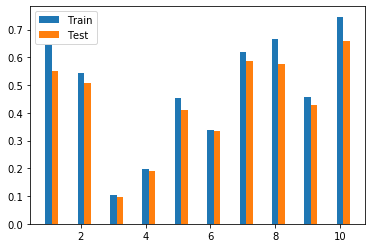

In [ ]:
##Plotting the data
xx = np.array(range(1,11))
plt.bar(xx,train_accuracy,width=0.2)
plt.bar(xx+0.2, test_accuracy,width=0.2)
plt.legend(["Train","Test"])
plt.show()

In [ ]:
# Activation Functions
a = ["identity","logistic","tanh","relu"]
# Solvers (Optimizers)
s = ["lbfgs","sgd","adam"]
# Learning Rate
lr = [0.0001,0.001,0.01,0.1]
# Hidden Layers and number of nodes in each layer
h = [(5,2),(3,2),(6,3),(7,2)]

In [ ]:
## Applying K-Folds cross-validator
kf = KFold(n_splits=3)

In [ ]:
# Function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,learning_rate_init=lr)
    return clf  
# Function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted)

In [ ]:
test_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
     #calling the mlp function with random hyper paramters
    clf = mlp(a[k1],s[k2],h[k4],lr[k3])
    tempTrain = 0
    tempTest = 0
    for nbrOfFolds,(train_index, test_index) in enumerate(kf.split(X)):
        ## Splitting the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test  = y[train_index], y[test_index]
        ##fit the data into the model
        clf.fit(X_train,Y_train)
        ##predicting the values on the fitted model using train data
        predTrain = clf.predict((X_train))
        #adding the accuracy
        tempTrain = tempTrain + accuracy(Y_train,predTrain)
        ##predict the values on the fitted model using test data
        predTest = clf.predict((X_test))
        #adding the accuracy
        tempTest = tempTest + accuracy(Y_test,predTest)
    ##Calculating the train accuracy
    print(f'Number of folds is{nbrOfFolds+1}')
    train_accuracy.append(tempTrain*1.0/(nbrOfFolds+1))
    ##Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/(nbrOfFolds+1))
    print("(train,test) accuracy = ",tempTrain*1.0/(nbrOfFolds+1), tempTest*1.0/(nbrOfFolds+1))


Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Number of folds is3
(train,test) accuracy =  0.5734557595993323 0.5203116304952699

Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is3
(train,test) accuracy =  0.7234279354479689 0.6310517529215359

Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (5, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is3
(train,test) accuracy =  0.46271563717306624 0.38786867000556485

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (3, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is3
(train,test) accuracy =  0.6001669449081803 0.5175292153589316

Hyper-parameters = 
 activation =  tanh 
 solver =  adam 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (3, 2)
Number of folds is3
(train,test) accuracy =  0.12993878686700056 0.13633834168057876

Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (3, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of folds is3
(train,test) accuracy =  0.3152476349471341 0.2938230383973289

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (7, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of folds is3
(train,test) accuracy =  0.4872008903728436 0.44518642181413465

Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:92: RuntimeWarning: invalid value encountered in 

Number of folds is3
(train,test) accuracy =  0.46188091263216474 0.4045631608235949

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:92: RuntimeWarning: invalid value 

Number of folds is3
(train,test) accuracy =  0.09905397885364496 0.09905397885364496

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of folds is3
(train,test) accuracy =  0.47495826377295486 0.44908180300500833


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


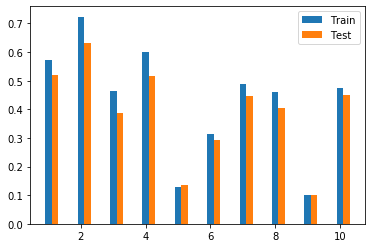

In [ ]:
##Plotting the data
xx = np.array(range(1,11))
plt.bar(xx,train_accuracy,width=0.2)
plt.bar(xx+0.2, test_accuracy,width=0.2)
plt.legend(["Train","Test"])
plt.show()